In [0]:
#three things I'll do here: 
#classifying movie reviws as positive or negative (binary classification)
#classifying news wires by topic (multi-class classification)
#estimating the price of a house, given real-estate data (regression)

In [0]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf 


In [0]:
!pip install numpy==1.16.1
import numpy as np

In [0]:
import numpy as np 
import scipy as sc

In [0]:
layers = tf.keras.layers
mnist = tf.keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
models = tf.keras.models
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(10, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [0]:
optimizers = tf.keras.optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])https://bit.ly/2WCvgas

In [0]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]* train_images.shape[2]).astype('float32')/255

In [0]:
to_categorical = tf.keras.utils.to_categorical

In [0]:
train_labels = to_categorical(train_labels)

In [13]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0235 - accuracy: 0.8472
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0136 - accuracy: 0.9122
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0122 - accuracy: 0.9211
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0115 - accuracy: 0.9250
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0110 - accuracy: 0.9289
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0106 - accuracy: 0.9316
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0104 - accuracy: 0.9334
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0101 - accuracy: 0.9357
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0099 - accuracy: 0.9362
Epoch 10/10
60000/60000 [============

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words = 10000)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def vectorize_sequences(sequences, dimensions =10000):
  results = np.zeros((len(sequences), dimensions)) #creates an all zero matric of shape 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [0]:
y_train = np.asarray(y_train).astype('float32')

In [0]:
y_test = np.asarray(y_test).astype('float32')

In [0]:
models = tf.keras.models
layers = tf.keras.layers
model = models.Sequential() #why do we need to define a sequential model type here? 

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
losses = tf.keras.losses
metrics = tf.keras.metrics
optimizers = tf.keras.optimizers


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
#separate a validation set of 10k samples
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [117]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=28, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 387us/sample - loss: 2.0891e-05 - acc: 1.0000 - val_loss: 3.6260 - val_acc: 0.8549
Epoch 2/20
15000/15000 [==============================] - 4s 260us/sample - loss: 5.9708e-07 - acc: 1.0000 - val_loss: 3.9599 - val_acc: 0.8558
Epoch 3/20
15000/15000 [==============================] - 4s 254us/sample - loss: 3.4349e-07 - acc: 1.0000 - val_loss: 4.1879 - val_acc: 0.8568
Epoch 4/20
15000/15000 [==============================] - 4s 259us/sample - loss: 1.3216e-07 - acc: 1.0000 - val_loss: 4.3640 - val_acc: 0.8565
Epoch 5/20
15000/15000 [==============================] - 4s 262us/sample - loss: 5.7399e-08 - acc: 1.0000 - val_loss: 4.4816 - val_acc: 0.8571
Epoch 6/20
15000/15000 [==============================] - 4s 257us/sample - loss: 3.4417e-08 - acc: 1.0000 - val_loss: 4.5674 - val_acc: 0.8569
Epoch 7/20
15000/15000 [==============================] - 4s 263us/sample - loss: 2.26

In [103]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
history_dict = history.history

In [105]:
history_dict

{'acc': [0.99953336,
  0.99986666,
  0.99993336,
  0.99993336,
  0.99993336,
  0.99993336,
  0.99993336,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.00033113957819981294,
  0.00014263409406981034,
  8.188055961152693e-05,
  8.507322529399278e-05,
  6.844407937823853e-05,
  6.28304833360094e-05,
  3.0203612198867584e-05,
  4.1799318290869316e-06,
  5.050050600947324e-07,
  2.397840422715806e-07,
  1.3660214000628985e-07,
  9.063311204081857e-08,
  5.894250489900746e-08,
  3.6801711277907974e-08,
  2.247194233527538e-08,
  1.4381817969022016e-08,
  1.0128499134284923e-08,
  6.341267891770622e-09,
  4.073959161959294e-09,
  2.6920323879482566e-09],
 'val_acc': [0.8567,
  0.8594,
  0.8584,
  0.8556,
  0.8566,
  0.8582,
  0.8588,
  0.8585,
  0.8551,
  0.8579,
  0.8557,
  0.8579,
  0.8585,
  0.8589,
  0.8573,
  0.8592,
  0.8588,
  0.8588,
  0.8584,
  0.859],
 'val_loss': [0.13669968994188256,
  0.13301529448725025,
  0.1352348707932

In [106]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [0]:
acc = history_dict['acc']

In [0]:
epochs = range(1, len(acc)+1)

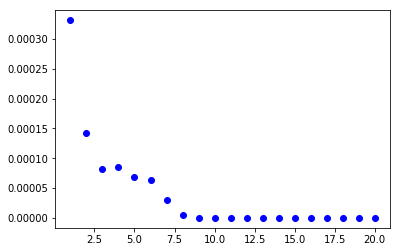

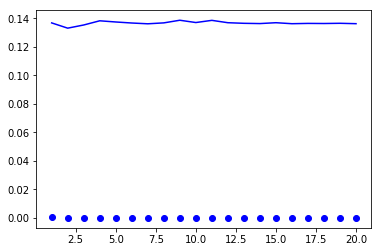

In [114]:
plt.plot(epochs, val_loss_values, 'b', label='Validation_loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')